# Script for Producing Figure 2
<p>Mehić and Saltikov, Environ Micro, 2022</p>
<p>Processes the raw data from the platereader and plots three panels</p>
<p>Panel A and B are contained in one file.</p>
<p>Panel C is contained in a separate file.</p>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import string
from matplotlib import container
import matplotlib as mpl
import seaborn as sns
import os
import pprint
from pathlib import Path

In [3]:
mpl.rcParams.update(mpl.rcParamsDefault)
# Change font preferences
mpl.rcParams['pdf.fonttype'] = 42
# Say, "the default sans-serif font is COMIC SANS"
mpl.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
mpl.rcParams['font.family'] = "sans-serif"
# set default font size
mpl.rcParams.update({'font.size': 7})

<H1>Houeskeeping for data files and results</H1>

In [26]:
# Set the data in and out directories
project_dir = Path().absolute()

# Directory where results will go
out_dir = Path("results")

# Check if the results direcorty exists
if not out_dir.exists():
    # If it doesn't exist, create the directory
    directory_path.mkdir()

# Path to data files
panel_ab = project_dir.joinpath("data/figure2AB_data.csv")
panel_c = project_dir.joinpath("data/figure2C_data.csv")

## Read in data for panels A and B

In [31]:
# read in the aerobic growth curve data file, this is wide format
dfAB = pd.read_csv(panel_ab, index_col=0)
# remove the odd column at the end the dataframe... has no data in it
dfC = pd.read_csv(panel_c, index_col=0)

In [32]:
dfAB.head()

,time hr,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,H3,H4,H5,H6,H7,H8,H9,H10,H11,H12
0,0.0,0.0839,0.0844,0.0853,0.0868,0.0867,0.0860,0.0858,0.0859,0.0873,...,0.0972,0.0966,0.0976,0.0965,0.0959,0.0955,0.0972,0.1006,0.1026,0.0943
45,1.5,0.0844,0.0849,0.0860,0.0873,0.0872,0.0866,0.0866,0.0865,0.0870,...,0.1064,0.1057,0.1062,0.1060,0.1057,0.1055,0.1052,0.1040,0.1035,0.1027
90,3.0,0.0841,0.0850,0.0859,0.0871,0.0869,0.0868,0.0864,0.0864,0.0875,...,0.1394,0.1374,0.1336,0.1327,0.1333,0.1333,0.1342,0.1303,0.1309,0.1312
135,4.5,0.0845,0.0847,0.0862,0.0871,0.0873,0.0870,0.0863,0.0866,0.0874,...,0.2093,0.1948,0.1836,0.1739,0.1866,0.1775,0.1870,0.1727,0.1741,0.1768
180,6.0,0.0841,0.0848,0.0862,0.0871,0.0873,0.0869,0.0864,0.0866,0.0873,...,0.3460,0.3269,0.3194,0.2834,0.3083,0.3116,0.3239,0.2891,0.2913,0.2853


In [33]:
dfC

,0 mM As(III),1 mM As(III),2 mM As(III),Control,0 mM As(III) std,1 mM As(III) std,2 mM As(III) std,Control std
Time (h),,,,,,,,
0,0.020333,0.020333,0.017667,0.003333,0.003215,0.003786,0.000577,0.003055
9,0.386000,0.053667,0.038000,0.002000,0.031432,0.008145,0.001000,0.002646
10,0.526000,0.054333,0.039000,0.001333,0.034641,0.007572,0.001732,0.002309
12,0.693333,0.053667,0.038333,0.001333,0.030551,0.005508,0.001528,0.002309
16,0.739333,0.056667,0.037000,0.002333,0.018475,0.007234,0.001000,0.002082
23,0.818667,0.103000,0.046333,0.001667,0.019630,0.020664,0.003786,0.001528
36,0.871667,0.628000,0.045333,0.001667,0.010408,0.109234,0.004509,0.002082


In [34]:
def format_legend(ax, **kwargs):
    # remove the errorbars within the legend
    handles, labels = ax.get_legend_handles_labels()
    handles = [h[0] if isinstance(h, container.ErrorbarContainer) else h for h in handles]
    if kwargs:
        for key, value in kwargs.items():
            if key == "nudge_leg":
                # value should be np.arrange(start, end, interval)
                return ax.legend(handles, labels, frameon=False, loc="upper left", bbox_to_anchor=value)
    return ax.legend(handles, labels, frameon=False, loc="upper left")

## Figure 2 code

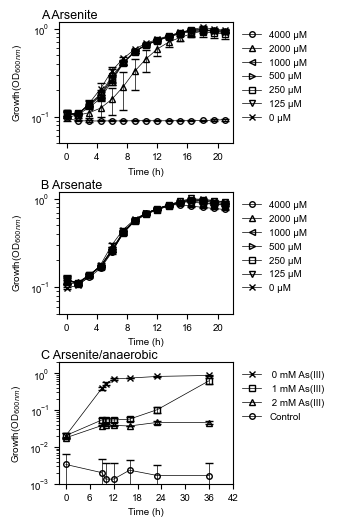

In [48]:
plate_reader_mapping = {}
# make a dictionary for the columns corresponding to either As3 or As5
arsenic_dic = {"Arsenite" : [1, 2, 3, 4, 5, 6 ],
           "Arsenate" : [7, 8, 9, 10, 11, 12]}

markersize=4
capsize=3

# make a list of the arsenic concentrations in uM
concentrations = {"Arsenate": [4000, 2000, 1000, 500, 250, 125, 0],
                 "Arsenite": [4000, 2000, 1000, 500, 250, 125, 0]}

# Make a list of the markers I'd like to plot
markers = ["o", "^", "<", ">", "s", "v", "x"]

# Set up the plot object, 3 rows, 1 column
fig, axs = plt.subplots(3,1, figsize=(2.25, 6),
                        gridspec_kw={'height_ratios': [1, 1, 1],
                                     'hspace': 0.4})

# Make Panel A and B by looping from the dictionary corresponding list
graph = 0 # counter for the subplot position 
# loop through the dictionary of arsenite/arsenate concentrations
for arsenic, columns in arsenic_dic.items():
    counter = 0
    # gets the columns in the 96 well plate data for the corresponding arsenic concentrations
    for row in [str(i) for i in string.ascii_uppercase[1:8]]:  # ['B', 'C', 'D', 'E', 'F', 'G', 'H']
        if (arsenic == "Arsenite") and (concentrations[arsenic][counter]==4000):
            groups = [row+str(col) for col in columns[0:4]]
            plate_reader_mapping[f"{arsenic}_{concentrations[arsenic][counter]}"] = groups
        else:
            groups = [row+str(col) for col in columns]  # e.g ['H7', 'H8', 'H9', 'H10', 'H11', 'H12']
            plate_reader_mapping[f"{arsenic}_{concentrations[arsenic][counter]}"] = groups
        axs[graph].errorbar(x= dfAB["time hr"],
                            y= dfAB.loc[:,groups].mean(axis=1),
                            yerr= dfAB.loc[:,groups].std(axis=1),
                            label = str(concentrations[arsenic][counter]) + str(u" \u03bcM"),
                            capsize=capsize,
                            linewidth=0.5,
                            color="black",
                            marker=markers[counter],
                            markersize=markersize,
                            mfc="none",
                            mec="black")
        counter +=1
    # Adjust the ticks and axis limits
    axs[graph].set_xticks(np.arange(0, 21, step=4))
    axs[graph].set_yticks(np.arange(0, 1.2, step=0.2))
    axs[graph].set_ylim([.05, 1.2])
    axs[graph].set_yscale("log")
    
    # Set the labels
    #if graph == 0:
    #axs[graph].set_ylabel(r"Growth(OD$_{600nm}$)")
    #axs[graph].set_xlabel("Time (h)")
    axs[graph].text(x=-.1, y= 1.1, s= f"{string.ascii_uppercase[graph]} {arsenic}", 
                    fontsize=9, va='top', transform=axs[graph].transAxes)
    
    # remove the errorbars within the legend
    format_legend(axs[graph], nudge_leg=(1,1,0,0))
    
    # done with previous plot
    graph +=1
    

# Make Panel C
time = dfC.index
for x in range(dfC.shape[1]-4):
    label = dfC.iloc[:,x].name
    y = dfC.iloc[:, x]
    err = dfC.iloc[:, x+4]
    axs[2].errorbar(x=time,
                    y=y,
                    yerr=err,
                    capsize=capsize,
                    linewidth=0.5,
                    color="black",
                    marker=["x", "s", "^", "o"][x],
                    mfc="none",
                    mec="black",
                    markersize=markersize,
                    label=label)

# Adjust the ticks and axis limits
axs[2].set_xticks(np.arange(0, 43, step=6))
axs[2].yaxis.set_ticks(np.arange(0.001, 1.2, step=0.2))
axs[2].set_ylim([.001, 2])
axs[2].set_yscale("log")

axs[2].text(x=-.1, y= 1.1, s= f"C Arsenite/anaerobic", 
                fontsize=9, va='top', transform=axs[graph].transAxes)

format_legend(axs[2], nudge_leg=(1,1,0,0))

for ax in axs:
    ax.set_ylabel(r"Growth(OD$_{600nm}$)")
    ax.set_xlabel("Time (h)")

plt.savefig(out_dir.joinpath("Fig2_ORIO_GC_arsenite_graph.pdf"), bbox_inches='tight')
plt.show()

In [50]:
# Plate Reader well mapping
plate_reader_mapping

{'Arsenite_4000': ['B1', 'B2', 'B3', 'B4'],
 'Arsenite_2000': ['C1', 'C2', 'C3', 'C4', 'C5', 'C6'],
 'Arsenite_1000': ['D1', 'D2', 'D3', 'D4', 'D5', 'D6'],
 'Arsenite_500': ['E1', 'E2', 'E3', 'E4', 'E5', 'E6'],
 'Arsenite_250': ['F1', 'F2', 'F3', 'F4', 'F5', 'F6'],
 'Arsenite_125': ['G1', 'G2', 'G3', 'G4', 'G5', 'G6'],
 'Arsenite_0': ['H1', 'H2', 'H3', 'H4', 'H5', 'H6'],
 'Arsenate_4000': ['B7', 'B8', 'B9', 'B10', 'B11', 'B12'],
 'Arsenate_2000': ['C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
 'Arsenate_1000': ['D7', 'D8', 'D9', 'D10', 'D11', 'D12'],
 'Arsenate_500': ['E7', 'E8', 'E9', 'E10', 'E11', 'E12'],
 'Arsenate_250': ['F7', 'F8', 'F9', 'F10', 'F11', 'F12'],
 'Arsenate_125': ['G7', 'G8', 'G9', 'G10', 'G11', 'G12'],
 'Arsenate_0': ['H7', 'H8', 'H9', 'H10', 'H11', 'H12']}